# What you'll learn

After watching this video, you will be able to:
* Describe how to use the Tekton CLI to get task information.
* Explain how to deploy an application using only CLI commands.
* Explain how to deploy an application using Kubernetes manifests.

# CD Pipeline

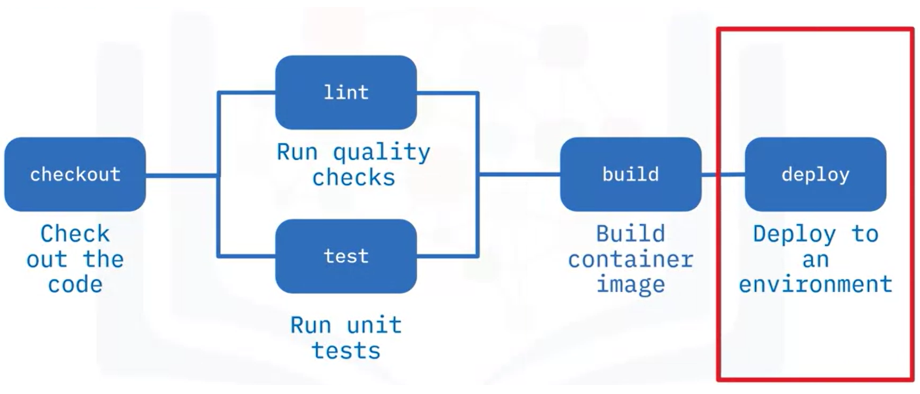

You are now at the final stage of your CD pipeline.

You have addressed:
* checking out the code by cloning it from GitHub, 
* running quality checks and unit tests like flake8 and nose, and 
* you have built a container image and pushed it to a local registry.

Now it's time to deploy your application to an environment, specifically Kubernetes.

# Application deployment options

There are many ways that you can choose to deploy your application to Kubernetes.
* You could use the `kubectl` command to deploy to the cluster.
* This is the official Kubernetes command line interface, or CLI.
* You can also use the `OC` (or **OpenShift Cluster CLI**) command if you're deploying to an OpenShift cluster, as you will in the labs.
* Many of the `oc` commands work with native Kubernetes as well because `oc` is a proper superset of `kubectl`.
* For both of these methods, you could use raw CLI commands with lots of parameters to configure your resource.
* But most people deploy using Kubernetes manifests in the form of YAML files that contain the description of the resources they want to deploy.
* Finally, there's a tool called **kustomize** (with a K), which is now part of the `kubectl` command, that allows you to customize those deployments to different environments on the fly with minimal changes to your manifest files.

# Results from Tekton hub Search

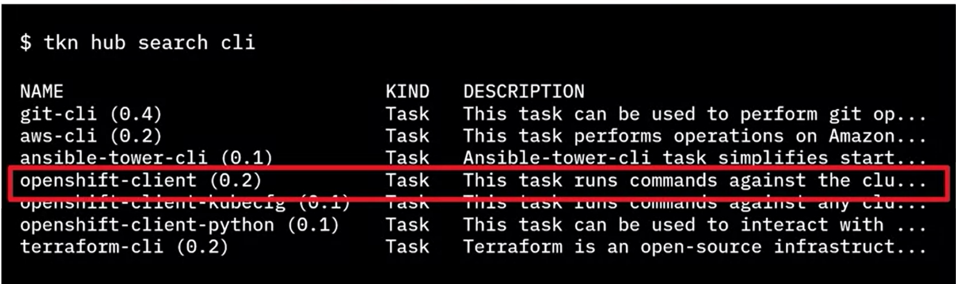

Since you want to use one of the command line interfaces to deploy your application, 
* You can use the command `tkn hub search` followed by the **"cli"** search criteria to search for tasks that have been annotated with the `cli` tag.
* All the tasks that match the keyword **"cli"** or have the `cli` tag are returned.
* You can see that the `openshift-client` is in this list, so let's investigate that one.

# Getting task information

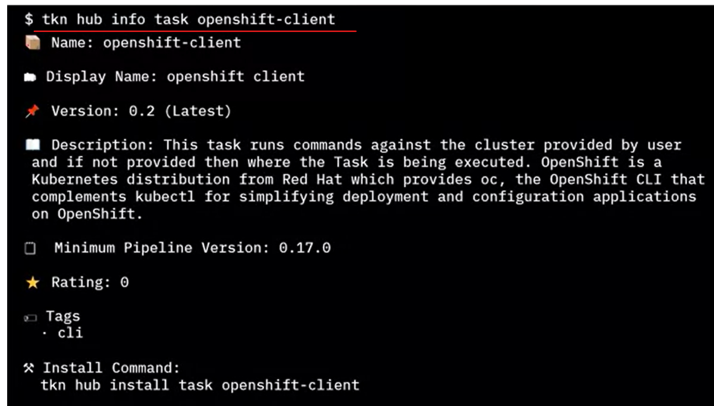

* You can get more information on a task from the command line without going to **Tekton Hub**.
* To do this, you use the command `tkn hub info task` and then the name of the task that you want information on, which in this example is `openshift-client`.
* You see a detailed description returned that describes the task and even tells you how to install it.
* From the description, you can see that this is exactly what you need, so let's install it.

# Install the Openshift Client task

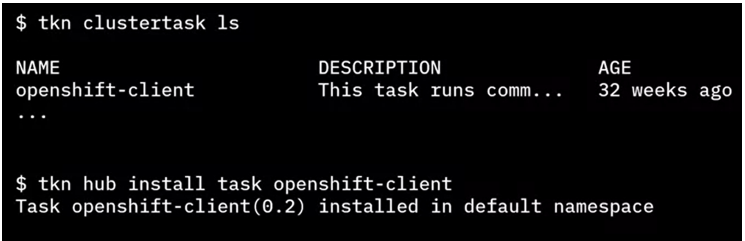

* Once again, I'd like to point out that tasks can be installed by an administrator at the cluster level or at the local level.
* It's always a good idea to use the command: `tkn clustertask ls` to see what cluster tasks are already installed.
* In this example, **openshift-client** is installed at the cluster level so there is no need to install it locally in your namespace.
* If this is the case in your cluster, you are good to go.

Otherwise, you can install the **openshift-client** task using the **Tekton CLI**.
* The command is `tkn hub install task` and then the name of the task that you want to install, which in this case is `openshift-client`.
* You should see a returned result indicating that **openshift-client** has been installed in your current default namespace.

# Openshift client documentation

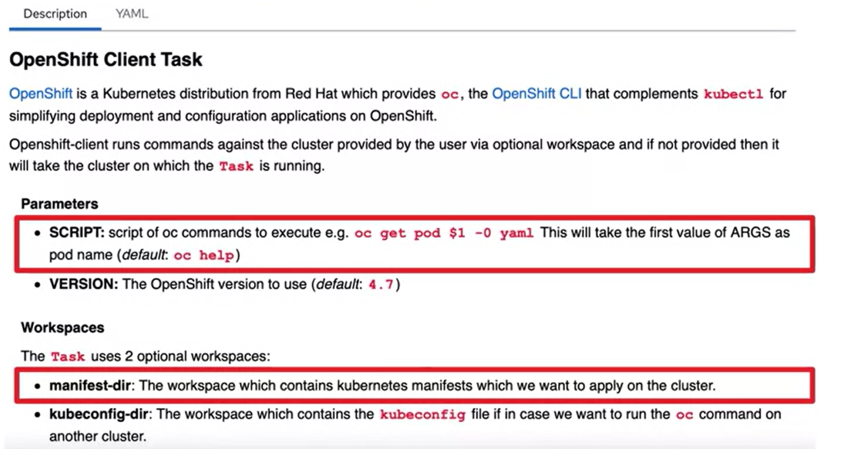

If you look at the OpenShift Client task documentation on **Tekton Hub**, you see that it requires only one parameter with the name `SCRIPT` that represents the script you want to run.
* It also specifies an optional parameter named `manifest-dir` if you have any manifests you want to deploy from.
* This looks to be perfect for deploying your application in a variety of ways.

# Add deploy task to the pipeline

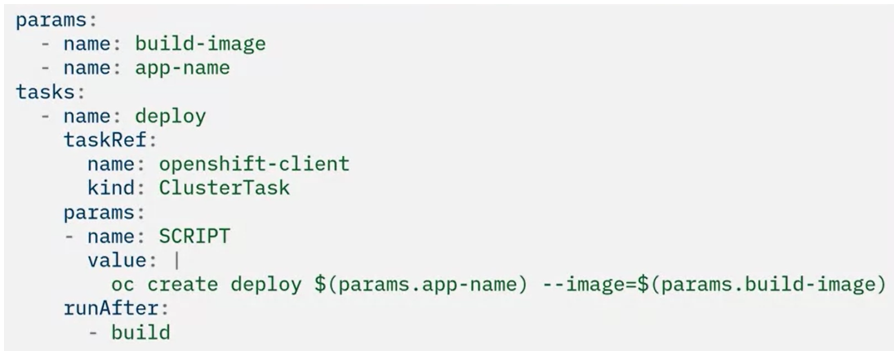

Let's add the deploy task to the pipeline using a single command line that specifies the deployment name and what image to use.
* You can reuse the pipeline parameter called `build-image` from the build task.
* This is the nice thing about pipeline parameters, you can reuse them across multiple pipeline tasks.
* You need to add a new pipeline parameter for the application name, which you call `app-name`, to be used later with the `oc` command.
* Now you can add a new task.
* You name it `deploy`.
* Then, you reference the openshift-client task you installed.
* If you are using the cluster task version, you must tell Tekton by using the `kind` keyword with the `ClusterTask` value.
* This is not needed if you installed it locally in your namespace.

Now it's time to create a parameter called `SCRIPT` because that's the name of the parameter that the **openshift-client** will look for.
* You give it a value that starts with a **vertical bar (the pipe character)** to indicate that the following lines are to be treated as one script.
* You use the `oc create deploy` command, passing it the name of the application and the name of the image from the pipeline parameters.
* This is why you added `app-name` to the parameters above.
* Finally, you specify that this pipeline task should run after the `build` task to be sure that the image is built before you deploy it. And that's it.

You have successfully added a deploy task to your pipeline using the **openshift-client** task from the **Tekton catalog** at **Tekton Hub**.

# Alternate deploy implementation

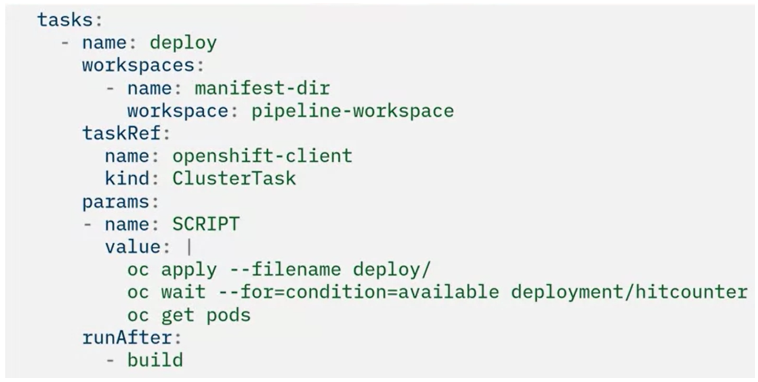

Let's look at an alternate deploy implementation.

Let's say you have Kubernetes manifests in the form of YAML files that specify the resources that you want to deploy.
* That will look slightly different.
* You don't need any pipeline parameters for this task.
* Everything will be specified in the manifests.

You start by adding a new task and naming it `deploy`.
* Then, you add a definition for the workspace.
* The documentation stated that the **openshift-client** task can use an **optional workspace** named `manifest-dir`, so you make that the name and use your **pipeline-workspace persistent volume claim**.

Next, you will reference the **openshift-client** task you installed. Once again, if you are using the cluster task, you must set the `kind` to `ClusterTask`, otherwise you can leave that out.

Now, you create the same parameter called `SCRIPT`, but the script will be slightly different.
* In this script version, you want to apply all the Kubernetes manifests in the `deploy/` folder.
* That folder is why you added the `manifest-dir` workspace.
* You use the `oc apply` command with the `--filename` flag and then the folder that contains the manifest files.
* Since a script can have multiple lines, you can use multiple commands.
* In this example, you wait for the deployment to roll out, and then list the pods.
* Finally, you specify that this pipeline task should `runAfter` the `build` task that builds the image you are deploying.

So, that's an alternate way of deploying your application to Kubernetes when you have a set of manifest YAML files that you want to apply.

# Summary

You learned that:
* The Tekton CLI can be used for both searching and getting information about tasks in Tekton Hub.
* There are multiple CLI tasks that allow you to run any CLI commands that you need.
* You can deploy applications using only commands or apply manifests in YAML format.